 A CNN based image classifier to predict the classes in CIFAR10 dataset



Importing necessary libraries


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
import keras

Load and Preprocess the Dataset:


In [36]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
X_train,X_test = X_train / 255.0, X_test / 255.0


In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
classes[9]

'truck'

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

converting y_train into 1 dimensional array


In [42]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

Plotting a sample from the dataset


In [49]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

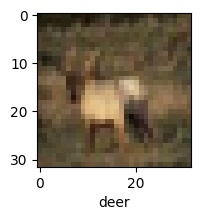

In [ ]:
plot_sample(X_train,y_train,3)

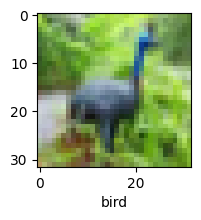

In [ ]:
plot_sample(X_train,y_train,6)

Build the CNN Model:





A reference picture to understand the flow of CNN
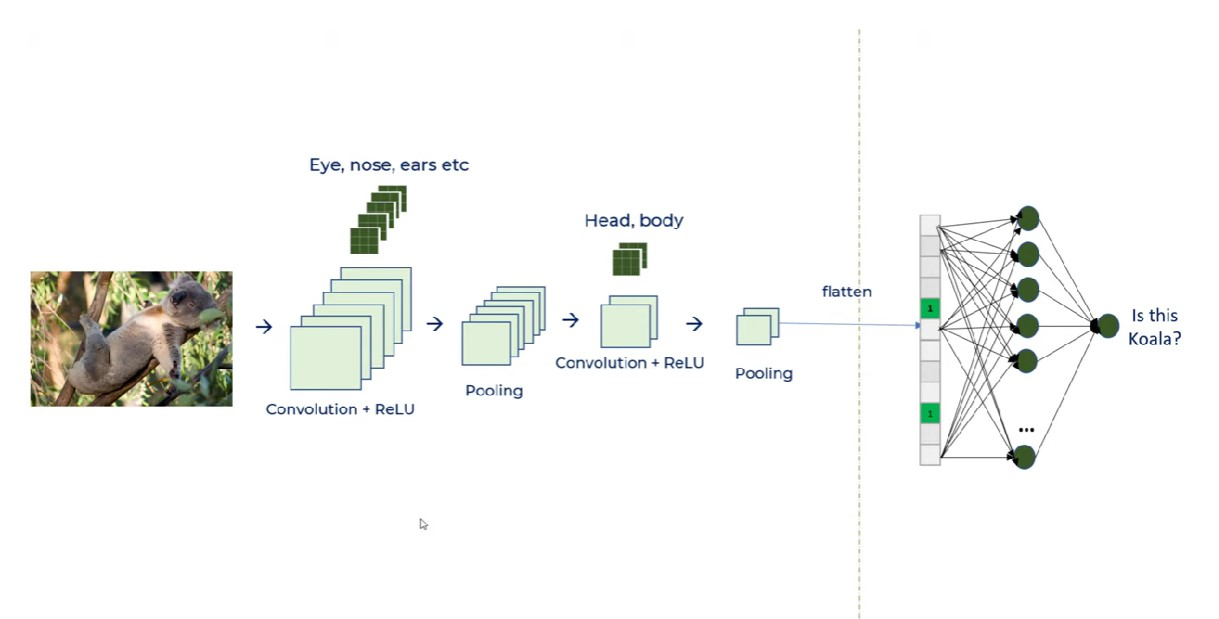


In [ ]:
model = keras.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10,activation='softmax')
])

Compile the Model:

Compile the model, specifying the loss function, optimizer, and metrics.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


Train the Model:

Train the model on the training data.

In [ ]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 64s 40ms/step - loss: 1.5293 - accuracy: 0.4400 - val_loss: 4.0086 - val_accuracy: 0.0531
Epoch 2/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.1596 - accuracy: 0.5882 - val_loss: 3.4538 - val_accuracy: 0.0724
Epoch 3/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.0109 - accuracy: 0.6446 - val_loss: 5.7100 - val_accuracy: 0.0568
Epoch 4/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.9073 - accuracy: 0.6819 - val_loss: 4.1745 - val_accuracy: 0.0766
Epoch 5/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8372 - accuracy: 0.7067 - val_loss: 5.5363 - val_accuracy: 0.0696
Epoch 6/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.7759 - accuracy: 0.7281 - val_loss: 5.8406 - val_accuracy: 0.0677
Epoch 7/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.7330 - accuracy: 0.7414 - val_loss: 4.9429 - val_accura

Evaluate the Model:

Evaluate the model on the test dataset to see how well it performs.

In [39]:
test_loss, test_acc = model.evaluate(X_test, y_test,verbose=2)
print(f'Test accuracy: {test_acc}')

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


313/313 - 4s - loss: 0.8857 - accuracy: 0.7062 - 4s/epoch - 12ms/step
Test accuracy: 0.7062000036239624


In [56]:
y_test=y_test.reshape(-1,)

In [57]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

Make Predictions:

we can use the trained model to make predictions on new images.

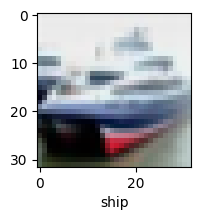

In [58]:
plot_sample(X_test,y_test,1)

In [59]:
y_pred = model.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 11ms/step


array([[7.3019502e-04, 1.5532724e-03, 1.6293997e-02, 6.9092256e-01,
        2.5400775e-04, 1.9340201e-01, 5.6233246e-02, 2.6473936e-03,
        1.2568141e-02, 2.5395177e-02],
       [2.7452423e-03, 1.8445940e-01, 5.6006694e-08, 4.6214740e-07,
        9.4826618e-08, 5.9101151e-09, 3.1760820e-08, 7.0764813e-08,
        8.1197250e-01, 8.2205667e-04],
       [4.2589929e-02, 2.6451904e-01, 2.5409183e-03, 5.2006249e-03,
        5.1058638e-03, 2.4750142e-04, 2.9271685e-03, 1.0179926e-03,
        4.7583738e-01, 2.0001355e-01],
       [8.2720393e-01, 2.7353659e-02, 5.9672058e-02, 3.8113028e-03,
        3.0164912e-02, 1.7721085e-04, 6.0294278e-04, 7.8140227e-05,
        4.9892012e-02, 1.0438180e-03],
       [3.4447981e-05, 2.1550995e-05, 1.3581250e-02, 7.8110839e-03,
        8.2585686e-01, 2.9951341e-03, 1.4967176e-01, 1.5037365e-06,
        1.8197323e-05, 8.1510998e-06]], dtype=float32)

In [61]:
y_classes=[np.argmax(element)for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [62]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

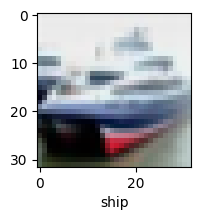

In [63]:
plot_sample(X_test,y_test,1)

In [65]:
classes[y_classes[1]]

'ship'

Since we've got 70% accuracy our model is predicting well

In [67]:
from sklearn.metrics import classification_report

# Now you can use classification_report
print("Classification Report: \n", classification_report(y_test, y_classes))


Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.80      0.73      1000
           1       0.75      0.86      0.80      1000
           2       0.62      0.57      0.60      1000
           3       0.57      0.50      0.53      1000
           4       0.61      0.77      0.68      1000
           5       0.72      0.55      0.62      1000
           6       0.81      0.76      0.78      1000
           7       0.78      0.71      0.75      1000
           8       0.87      0.70      0.78      1000
           9       0.71      0.84      0.77      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.70     10000
weighted avg       0.71      0.71      0.70     10000

